In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as smf
import seaborn as sns

In [34]:
data= pd.read_csv("insurance.csv")

In [35]:
data.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [33]:
data.head(10)

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,charges
0,19,27.900,0,0,1,0,0,1,16884.92400
1,18,33.770,1,1,0,0,1,0,1725.55230
2,28,33.000,3,1,0,0,1,0,4449.46200
3,33,22.705,0,1,0,1,0,0,21984.47061
4,32,28.880,0,1,0,1,0,0,3866.85520
5,31,25.740,0,0,0,0,1,0,3756.62160
6,46,33.440,1,0,0,0,1,0,8240.58960
7,37,27.740,3,0,0,1,0,0,7281.50560
8,37,29.830,2,1,0,0,0,0,6406.41070
9,60,25.840,0,0,0,1,0,0,28923.13692


In [4]:
dummy_gender= pd.get_dummies(data["sex"], prefix = "sex")
data = data.drop(["sex"], axis=1)
data = pd.concat([data, dummy_gender], axis = 1)
data = data.drop(["sex_female"], axis=1)

In [6]:
dummy_smoke= pd.get_dummies(data["smoker"], prefix = "smoker")
data = data.drop(["smoker"], axis=1)
data = pd.concat([data, dummy_smoke], axis = 1)
data= data.drop(["smoker_no"], axis=1)

In [7]:
dummy_region= pd.get_dummies(data["region"], prefix = "region")
data = data.drop(["region"], axis=1)
data = pd.concat([data, dummy_region], axis = 1)
data = data.drop(["region_northeast"], axis=1)

In [8]:
data.columns.tolist()

['age',
 'bmi',
 'children',
 'charges',
 'sex_male',
 'smoker_yes',
 'region_northwest',
 'region_southeast',
 'region_southwest']

In [9]:
data = data[['age',
 'bmi',
 'children',
 'sex_male',
 'smoker_yes',
 'region_northwest',
 'region_southeast',
 'region_southwest', 'charges']]

In [10]:
data.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,charges
0,19,27.900,0,0,1,0,0,1,16884.92400
1,18,33.770,1,1,0,0,1,0,1725.55230
2,28,33.000,3,1,0,0,1,0,4449.46200
3,33,22.705,0,1,0,1,0,0,21984.47061
4,32,28.880,0,1,0,1,0,0,3866.85520


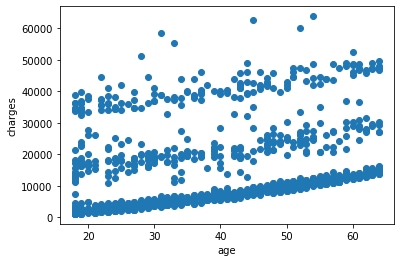

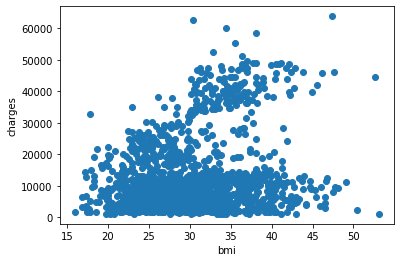

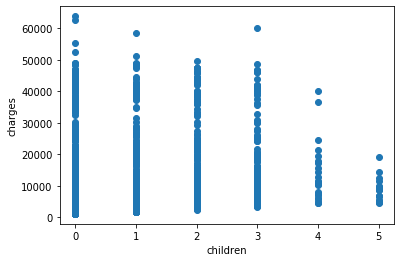

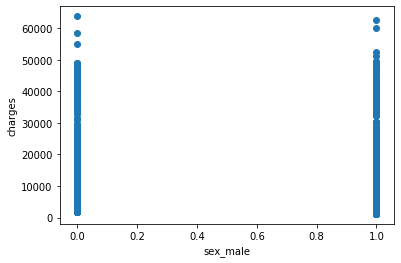

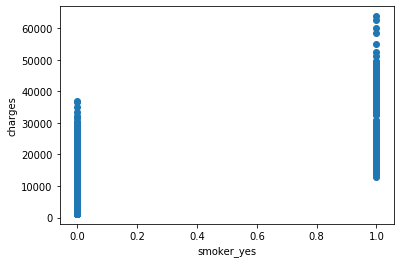

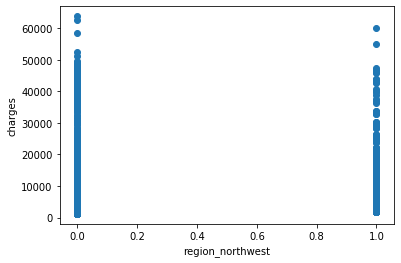

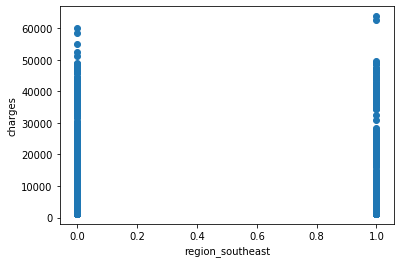

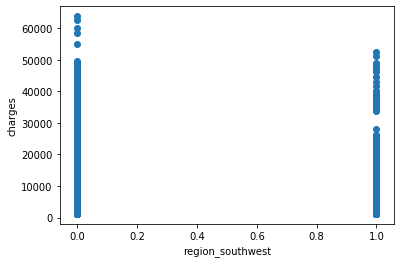

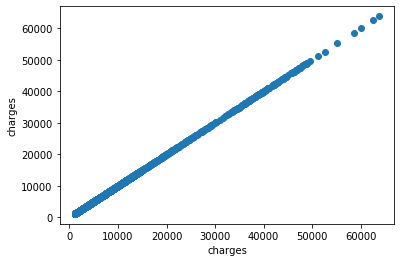

In [11]:
plt.figure()
for x in data.columns.tolist():
    plt.scatter(data[x],data["charges"])
    plt.xlabel(str(x))
    plt.ylabel("charges")
    plt.show()

In [12]:
X = data[['age', 'bmi','children','sex_male','smoker_yes','region_northwest','region_southeast','region_southwest']] 
y = data['charges']
## fit a OLS model with intercept on TV and Radio
X = smf.add_constant(X)
est = smf.OLS(y, X).fit()
est.summary()

C:\Users\Ulises Cabrera\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     500.8
Date:                Mon, 16 Sep 2019   Prob (F-statistic):               0.00
Time:                        23:23:55   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1329   BIC:                         2.716e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.194e+04    987.819    -12.086      0.000   -1.39e+04      -1e+04
age                256.8564     11.899     21.587      0.000     233.514     280.199
bmi                339.1935     28.599     11.860      0.000     283.088     395.298
children           475.5005    137.804      3.451      0.001     205.163     745.838
sex_male          -131.3144    332.945     -0.394      0.693    -784.470     521.842
smoker_yes        2.385e+04    413.153     57.723      0.000     2.3e+04    2.47e+04
region_northwest  -352.9639    476.276     -0.741      0.459   -1287.298     581.370
region_southeast -1035.0220    478.692     -2.162      0.031   -1974.097     -95.947
region_southwest  -960.0510    477.933     -2.009      0.045   -1897.636     -22.466
==============================================================================
Omnibus:                      300.366   Durbin-Watson:                   2.088
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              718.887
Skew:                           1.211   Prob(JB):                    7.86e-157
Kurtosis:                       5.651   Cond. No.                         311.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

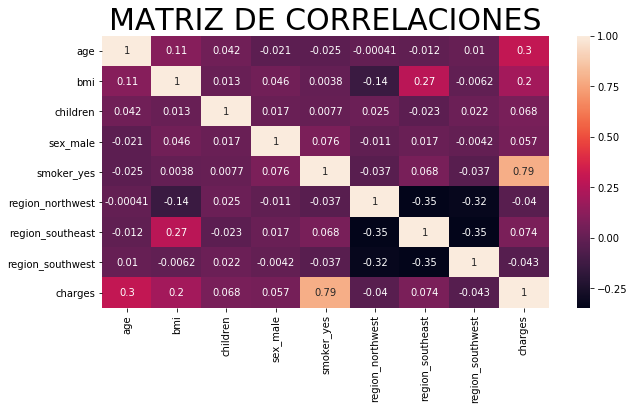

In [13]:
plt.figure(figsize=(10,5))
plt.title("MATRIZ DE CORRELACIONES", fontsize=30)
sns.heatmap(data.corr(), annot=True)

In [14]:
X2 = data[['age', 'bmi','smoker_yes','region_southeast']] 
y2 = data['charges']
## fit a OLS model with intercept on TV and Radio
X2 = smf.add_constant(X2)
est = smf.OLS(y2, X2).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     988.9
Date:                Mon, 16 Sep 2019   Prob (F-statistic):               0.00
Time:                        23:24:09   Log-Likelihood:                -13556.
No. Observations:                1338   AIC:                         2.712e+04
Df Residuals:                    1333   BIC:                         2.715e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.187e+04    944.659    -12.560      0.000   -1.37e+04      -1e+04
age                258.7708     11.938     21.677      0.000     235.352     282.190
bmi                334.8987     28.558     11.727      0.000     278.875     390.923
smoker_yes        2.387e+04    413.626     57.706      0.000    2.31e+04    2.47e+04
region_southeast  -613.7877    389.780     -1.575      0.116   -1378.438     150.862
==============================================================================
Omnibus:                      301.049   Durbin-Watson:                   2.079
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              714.025
Skew:                           1.218   Prob(JB):                    8.94e-156
Kurtosis:                       5.622   Cond. No.                         292.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
data2=data[['age', 'bmi','smoker_yes','region_southeast','charges']] 

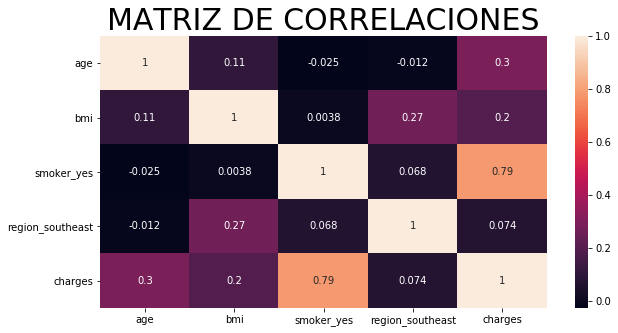

In [16]:
plt.figure(figsize=(10,5))
plt.title("MATRIZ DE CORRELACIONES", fontsize=30)
sns.heatmap(data2.corr(), annot=True)

In [17]:
X3 = data[['age', 'bmi','smoker_yes']] 
y3 = data['charges']
## fit a OLS model
X3 = smf.add_constant(X3)
est = smf.OLS(y3, X3).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     1316.
Date:                Mon, 16 Sep 2019   Prob (F-statistic):               0.00
Time:                        23:24:21   Log-Likelihood:                -13557.
No. Observations:                1338   AIC:                         2.712e+04
Df Residuals:                    1334   BIC:                         2.714e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.168e+04    937.569    -12.454      0.000   -1.35e+04   -9837.561
age          259.5475     11.934     21.748      0.000     236.136     282.959
bmi          322.6151     27.487     11.737      0.000     268.692     376.538
smoker_yes  2.382e+04    412.867     57.703      0.000     2.3e+04    2.46e+04
==============================================================================
Omnibus:                      299.709   Durbin-Watson:                   2.077
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              710.137
Skew:                           1.213   Prob(JB):                    6.25e-155
Kurtosis:                       5.618   Cond. No.                         289.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
data3= data[['age', 'bmi','smoker_yes','charges']]

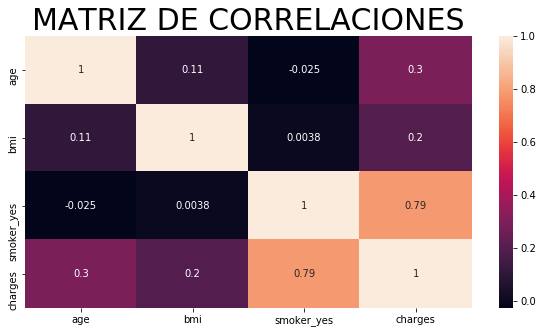

In [19]:
plt.figure(figsize=(10,5))
plt.title("MATRIZ DE CORRELACIONES", fontsize=30)
sns.heatmap(data3.corr(), annot=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x20e7c946dd8>,
 'caps': [<matplotlib.lines.Line2D at 0x20e7c954780>,
 'boxes': [<matplotlib.lines.Line2D at 0x20e7c946c88>],
 'medians': [<matplotlib.lines.Line2D at 0x20e7c954e10>],
 'fliers': [<matplotlib.lines.Line2D at 0x20e7c954ef0>],
 'means': []}

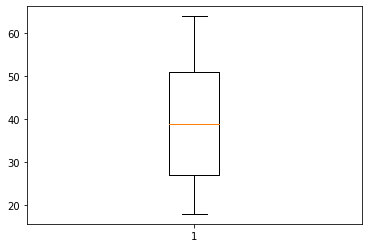

In [21]:
plt.boxplot(data["age"])

{'whiskers': [<matplotlib.lines.Line2D at 0x20e7c9ae5c0>,
 'caps': [<matplotlib.lines.Line2D at 0x20e7c9aecc0>,
 'boxes': [<matplotlib.lines.Line2D at 0x20e7c9ae198>],
 'medians': [<matplotlib.lines.Line2D at 0x20e7c9b9390>],
 'fliers': [<matplotlib.lines.Line2D at 0x20e7c9b96d8>],
 'means': []}

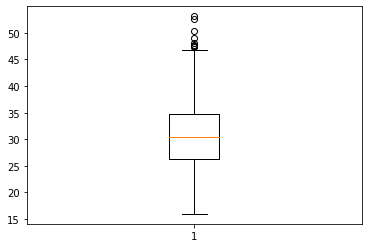

In [22]:
plt.boxplot(data["bmi"])

{'whiskers': [<matplotlib.lines.Line2D at 0x20e7ca11ba8>,
 'caps': [<matplotlib.lines.Line2D at 0x20e7ca11ef0>,
 'boxes': [<matplotlib.lines.Line2D at 0x20e7ca11780>],
 'medians': [<matplotlib.lines.Line2D at 0x20e7ca1b978>],
 'fliers': [<matplotlib.lines.Line2D at 0x20e7ca1bcc0>],
 'means': []}

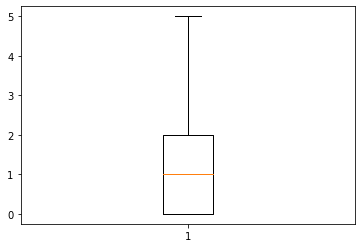

In [24]:
plt.boxplot(data["children"])

{'whiskers': [<matplotlib.lines.Line2D at 0x20e7b1f5a58>,
 'caps': [<matplotlib.lines.Line2D at 0x20e7b1f55f8>,
 'boxes': [<matplotlib.lines.Line2D at 0x20e7b1d4c88>],
 'medians': [<matplotlib.lines.Line2D at 0x20e7b1f50f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x20e7b66fb38>],
 'means': []}

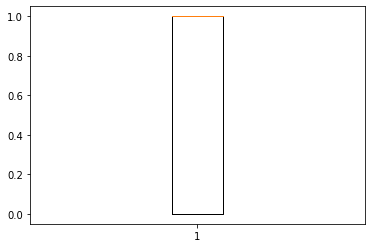

In [25]:
plt.boxplot(data["sex_male"])

{'whiskers': [<matplotlib.lines.Line2D at 0x20e7da87438>,
 'caps': [<matplotlib.lines.Line2D at 0x20e7da87b38>,
 'boxes': [<matplotlib.lines.Line2D at 0x20e7da77fd0>],
 'medians': [<matplotlib.lines.Line2D at 0x20e7da87f60>],
 'fliers': [<matplotlib.lines.Line2D at 0x20e7da93550>],
 'means': []}

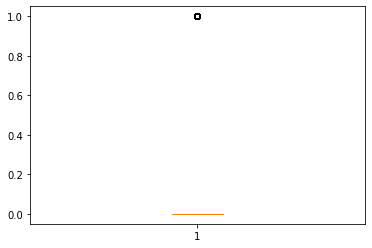

In [29]:
plt.boxplot(data["smoker_yes"])

{'whiskers': [<matplotlib.lines.Line2D at 0x20e7b620be0>,
 'caps': [<matplotlib.lines.Line2D at 0x20e7b6202e8>,
 'boxes': [<matplotlib.lines.Line2D at 0x20e7b620240>],
 'medians': [<matplotlib.lines.Line2D at 0x20e7b59bc18>],
 'fliers': [<matplotlib.lines.Line2D at 0x20e7b59bba8>],
 'means': []}

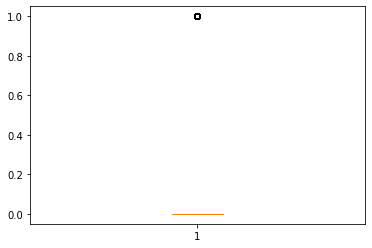

In [26]:
plt.boxplot(data["region_northwest"])

{'whiskers': [<matplotlib.lines.Line2D at 0x20e7b6d1240>,
 'caps': [<matplotlib.lines.Line2D at 0x20e7b6d1b00>,
 'boxes': [<matplotlib.lines.Line2D at 0x20e7b6d1400>],
 'medians': [<matplotlib.lines.Line2D at 0x20e7b6c0668>],
 'fliers': [<matplotlib.lines.Line2D at 0x20e7b6c0240>],
 'means': []}

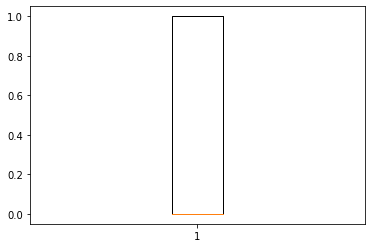

In [27]:
plt.boxplot(data["region_southeast"])

{'whiskers': [<matplotlib.lines.Line2D at 0x20e7b7149b0>,
 'caps': [<matplotlib.lines.Line2D at 0x20e7b714e48>,
 'boxes': [<matplotlib.lines.Line2D at 0x20e7b7145c0>],
 'medians': [<matplotlib.lines.Line2D at 0x20e7b70e780>],
 'fliers': [<matplotlib.lines.Line2D at 0x20e7b70eac8>],
 'means': []}

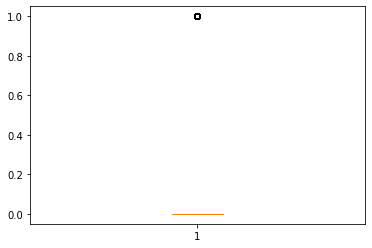

In [28]:
plt.boxplot(data["region_southwest"])

{'whiskers': [<matplotlib.lines.Line2D at 0x20e7dadfe48>,
 'caps': [<matplotlib.lines.Line2D at 0x20e7daeb588>,
 'boxes': [<matplotlib.lines.Line2D at 0x20e7dadfa20>],
 'medians': [<matplotlib.lines.Line2D at 0x20e7daebc18>],
 'fliers': [<matplotlib.lines.Line2D at 0x20e7daebf60>],
 'means': []}

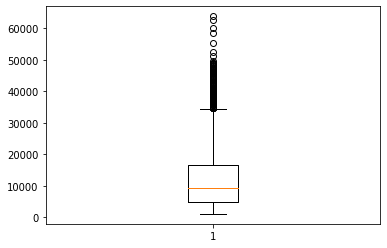

In [30]:
plt.boxplot(data["charges"])